# Проект "Выбор локации для скважины"

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

В данном проекте нам необходимо выполнить несколько этапов:
- Ознакомиться с имеющимися данными и подготовить их к обработке.
- Обучить и проверить модели для каждого из регионов.
- Подготовить данные к расчету прибыли.
- С помощью функции автоматизировать расчет прибыли для выбранных скважин и предсказаний модели.
- Оценить риски и прибыль каждого региона.
- Сделать финальный вывод.

## Загрузка и подготовка данных

В течение первого этапа нам необходимо ознакомиться с имеющимися данными и провести их предобработку, если необходимо, включая:
- Обработка пропусков;
- Оценка наличия явных и неявных дубликатов;
- Корректировка типов данных, где это применимо;
- Кодирование признаков, где это применимо.

In [1]:
# импортируем нужные библиотеки

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_curve, roc_auc_score
from sklearn.utils import shuffle
from tqdm import tqdm

In [2]:
data_1 = pd.read_csv('/datasets/geo_data_0.csv')
data_1.info()
data_1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [3]:
data_2 = pd.read_csv('/datasets/geo_data_1.csv')
data_2.info()
data_2.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [4]:
data_3 = pd.read_csv('/datasets/geo_data_2.csv')
data_3.info()
data_3.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


Как мы видим, во всех трёх датасетах содержится 100000 строк в 5 столбцах. Пропусков в данных нет.  

In [5]:
# также проверим наличие пропусков по каждому столбцу
list = ['id', 'f0', 'f1', 'f2', 'product']
data_1_na = []
data_2_na = []
data_3_na = []

for i in list:
    data_1_na.append(data_1[i].isna().sum())
    data_2_na.append(data_2[i].isna().sum())
    data_3_na.append(data_3[i].isna().sum())

print(f'Количество пропусков в столбцах датасета data_1: {data_1_na}')
print(f'Количество пропусков в столбцах датасета data_2: {data_2_na}')
print(f'Количество пропусков в столбцах датасета data_3: {data_3_na}')

Количество пропусков в столбцах датасета data_1: [0, 0, 0, 0, 0]
Количество пропусков в столбцах датасета data_2: [0, 0, 0, 0, 0]
Количество пропусков в столбцах датасета data_3: [0, 0, 0, 0, 0]


Изменения в типов данных столбцов не требуются.  
Названия столбцов с данными не требуют изменений.

На всякий случай проверим наличие дубликатов и уникальность идентификаторов скважин.

In [6]:
display(data_1['id'].duplicated().sum())
display(data_2['id'].duplicated().sum())
data_3['id'].duplicated().sum()


10

4

4

Видим, что в данных есть несколько повторяющихся уникальных идентификаторов.  
Так как их количество пренебрежимо мало, просто убираем эти строки.

In [7]:
data_1.drop_duplicates(['id'], inplace=True, ignore_index=True)
data_2.drop_duplicates(['id'], inplace=True, ignore_index=True)
data_3.drop_duplicates(['id'], inplace=True, ignore_index=True)

Так как сам столбец с уникальными идентификаторами никак не поможет нам в обучении модели, смело удаляем его из датасетов.

In [8]:
data_1 = data_1.drop('id', axis=1)
data_2 = data_2.drop('id', axis=1)
data_3 = data_3.drop('id', axis=1)

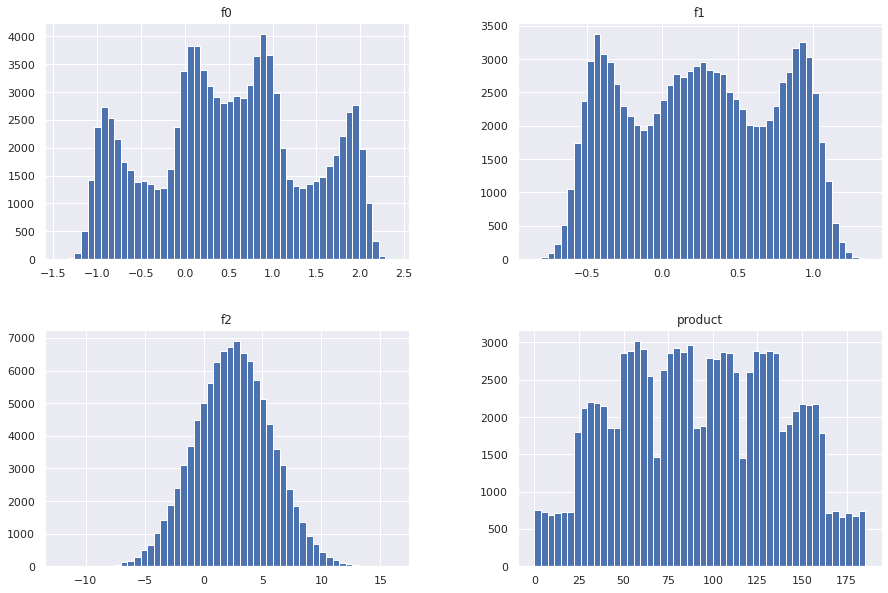

In [9]:
# осмотрим распределение имеющихся данных
sns.set_theme(style="darkgrid")
data_1[['f0', 'f1', 'f2', 'product']].hist(figsize=(15, 10), bins=50)
None

Видим, что в целом данные распределены в столбцах адеватно, без каких-либо видимых больших выбросов или аномалий.  
Кодирование признаков проводить не будем. Все они - количественные.

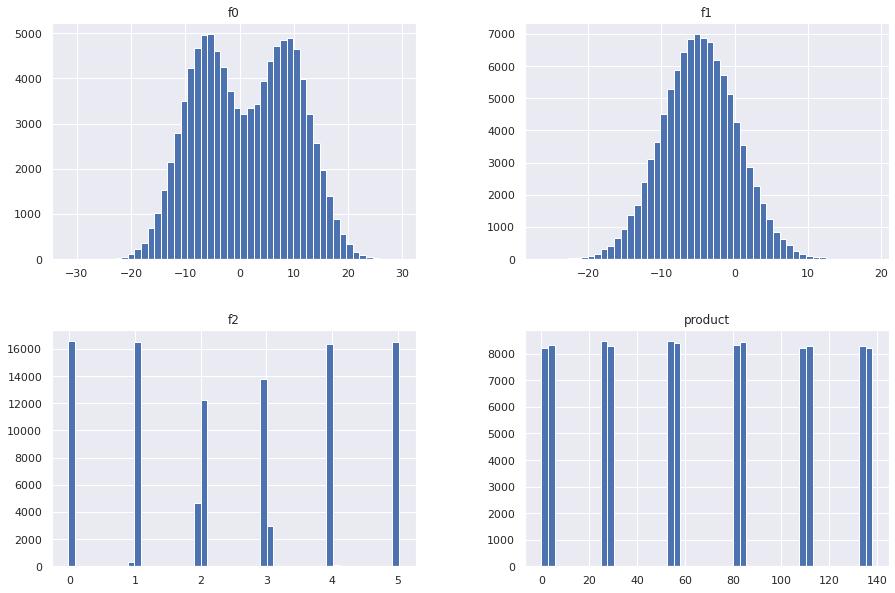

In [10]:
data_2[['f0', 'f1', 'f2', 'product']].hist(figsize=(15, 10), bins=50)
None

Видим, что данные в столбцах f2 и product сильно фрагментированы.  
Проверим, есть ли какая-то зависимость между фактором f2 и целевым признаком product.

,f2,product
f2,1.000000,0.999397
product,0.999397,1.000000


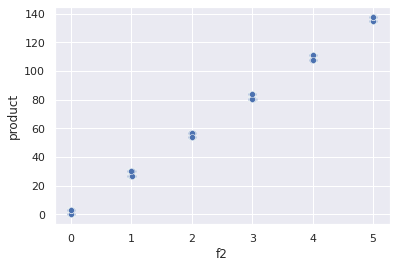

In [11]:
a = data_2[['f2', 'product']]

sns.scatterplot(data=a, x='f2', y='product')
a.corr()

Видим, что между этими признаками есть очень сильная зависимость. Учтём это на будущее.

Проверим, не являются ли признаки категориальными.

In [12]:
display(data_2['f2'].nunique())
data_2['product'].nunique()


99996

12

Целевой признак (объём запасов в конкретной скважине) действительно содержит только 12 уникальных значений на 100000 строк, а гистограмма визуально довольно сильно похожа на признак f2.  

Тем не менее, сам признак f2 не является категориальным и содержит 99996 уникальных значений, хоть они и довольно сильно сгруппированы.  
Попробуем категоризировать данные и применить one-hot encoding, так как по условию задачи используемой моделью является линейная регрессия.

In [13]:
def categorize_f2(row):
    try:
        if row['f2'] < 0.5:
            return 'a'
        elif 0.5 <=row['f2'] < 1.5:
            return 'b'
        elif 1.5 <=row['f2'] < 2.5:
            return 'c'
        elif 2.5 <=row['f2'] < 3.5:
            return 'd'
        elif 3.5 <=row['f2'] < 4.5:
            return 'e'
        elif 4.5 <= row['f2']:
            return 'f'
    except:
        return 'mistake'


In [14]:
# data_2['f2'] = data_2.apply(categorize_f2, axis=1)

# # проверим, что в функции не было ошибок
# display(data_2['f2'].unique())

# data_2.head(10)

In [15]:
# # ипользуем one hot encoding, избегая дамми-ловушки
# data_2 = pd.get_dummies(data_2, drop_first=True)
# data_2

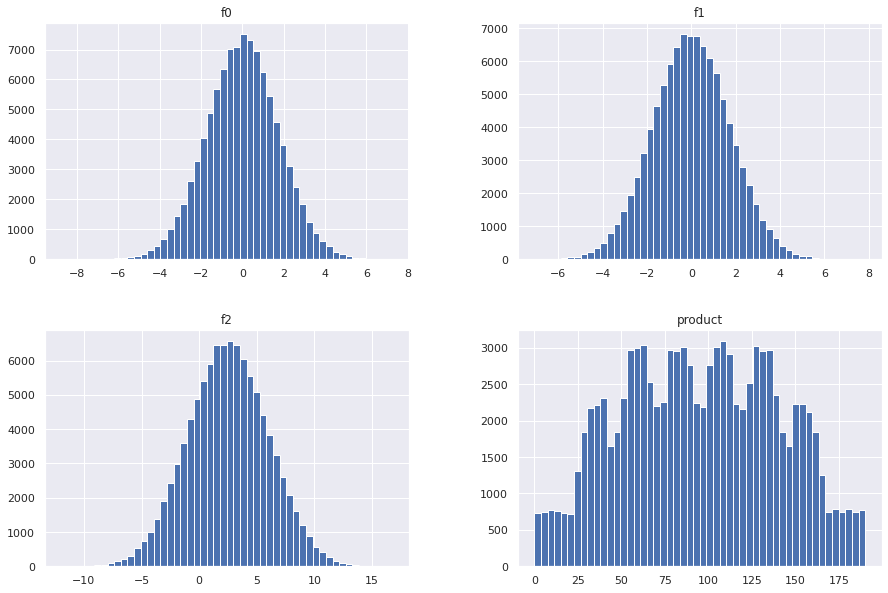

In [16]:
data_3[['f0', 'f1', 'f2', 'product']].hist(figsize=(15, 10), bins=50)
None

В этом датасете данные также распределены адеватно.  
Кодирование признаков здесь проводить не будем - все признаки количественные.

In [17]:
# разделим датасеты на целевой признак и все остальные
features_1 = data_1.drop('product', axis=1)
target_1 = data_1['product']

features_2 = data_2.drop('product', axis=1)
target_2 = data_2['product']

features_3 = data_3.drop('product', axis=1)
target_3 = data_3['product']


Итак в первом этапе мы:
- Ознакомились с имеющимися данными.
- Исследовали имеющиеся данные на предмет пропусков и дубликатов. Удалили строки с дубликатами из датасета.
- Изменений типов данных в столбцах не потребовалось.
- Исследовали имеющиеся количественные переменные и на предмет выбросов и аномалий. В регионе 2 была отмечена сильная корреляция между фактором f2 и целевым признаком.
- Также мы категоризировали фактор f2 в регионе 2 и применили кодирование One-hot encoding.

## Обучение и проверка модели

В течение второго этапа нам необходимо:
- Разбить данные на обучающую и валидационную выборки в соотношении 3:1.
- Провести масштабирование признаков.
- Обучить модель и сделайть предсказания на валидационной выборке.
- Сохранить предсказания и правильные ответы на валидационной выборке.
- Найти средний запас предсказанного сырья и RMSE модели.
- Проанализировать результаты.

Начнем по порядку.

In [18]:
# разделим выборки трёх датасетов на обучающие и валидационные
features_1_train, features_1_valid, target_1_train, target_1_valid = \
train_test_split(features_1, target_1, test_size=0.25, random_state=12345)
display(features_1_train.shape[0], features_1_valid.shape[0], target_1_train.shape[0], target_1_valid.shape[0])


74992

24998

74992

24998

In [19]:
features_2_train, features_2_valid, target_2_train, target_2_valid = \
train_test_split(features_2, target_2, test_size=0.25, random_state=12345)
display(features_2_train.shape[0], features_2_valid.shape[0], target_2_train.shape[0], target_2_valid.shape[0])


74997

24999

74997

24999

In [20]:
features_3_train, features_3_valid, target_3_train, target_3_valid = \
train_test_split(features_3, target_3, test_size=0.25, random_state=12345)
display(features_3_train.shape[0], features_3_valid.shape[0], target_3_train.shape[0], target_3_valid.shape[0])


74997

24999

74997

24999

In [21]:
# так как по условию проекта наша модель - линейная регрессия, произведем масштабирование нецелевых признаков

scaler = StandardScaler()
scaler.fit(features_1_train)

features_1_train_scaled = scaler.transform(features_1_train)
features_1_valid_scaled = scaler.transform(features_1_valid)

In [22]:
scaler.fit(features_2_train)

features_2_train_scaled = scaler.transform(features_2_train)
features_2_valid_scaled = scaler.transform(features_2_valid)

In [23]:
scaler.fit(features_3_train)

features_3_train_scaled = scaler.transform(features_3_train)
features_3_valid_scaled = scaler.transform(features_3_valid)

Теперь обучим модель линейной регрессии.

In [24]:
model_1 = LinearRegression()
model_1.fit(features_1_train_scaled, target_1_train)
predictions_1 = model_1.predict(features_1_valid_scaled)

model_1.score(features_1_valid_scaled, target_1_valid)

0.2723923460817068

In [25]:
model_2 = LinearRegression()
model_2.fit(features_2_train_scaled, target_2_train)
predictions_2 = model_2.predict(features_2_valid_scaled)

model_2.score(features_2_valid_scaled, target_2_valid)

0.9996222988190184

In [26]:
model_3 = LinearRegression()
model_3.fit(features_3_train_scaled, target_3_train)
predictions_3 = model_3.predict(features_3_valid_scaled)

model_3.score(features_3_valid_scaled, target_3_valid)

0.19556241810202346

In [27]:
# проверим устойчивость метрики score каждой с помощью кросс-валидации
scores_1 = cross_val_score(model_1, features_1, target_1)
scores_1

array([0.27932969, 0.26697998, 0.27942851, 0.28038523, 0.27119764])

In [28]:
scores_2 = cross_val_score(model_2, features_2, target_2)
scores_2

array([0.99962905, 0.99961947, 0.99961948, 0.99963127, 0.99962259])

In [29]:
scores_3 = cross_val_score(model_3, features_3, target_3)
scores_3

array([0.19197994, 0.19594339, 0.19912403, 0.2030268 , 0.20348554])

Видим, что показатель score отличается незначительно. Значит наша исходное разделение выборок достаточно репрезентативно.

Теперь оценим для каждой модели средний запас предсказанного сырья и значение RMSE.

In [30]:
display(predictions_1.mean())
rmse_1 = mean_squared_error(target_1_valid, predictions_1, squared=False)
rmse_1

92.78915638280621

37.853527328872964

In [31]:
display(predictions_2.mean())
rmse_2 = mean_squared_error(target_2_valid, predictions_2, squared=False)
rmse_2

69.1783195703043

0.8920592647717033

In [32]:
display(predictions_3.mean())
rmse_3 = mean_squared_error(target_3_valid, predictions_3, squared=False)
rmse_3

94.86572480562035

40.07585073246016

По результатам построения моделей мы получили следующие результаты:
- Регион 1 - средний запас предсказанного сырья 92.8, RMSE - 37.85;
- Регион 2 - средний запас предсказанного сырья 69.2, RMSE - 0.88;
- Регион 3 - средний запас предсказанного сырья 94.9, RMSE - 40.08;

Как мы видим, наибольшее значение среднего предсказанного сырья (94.9) имеет регион №3.  
Тем не менее, регионы 1 и 3 имеют значительные показатели RMSE, что говорит о большом количестве отклонений предсказаний от среднего показателя.  
С другой стороны, хоть регион 2 и показал самое меньшее значение запасов, RMSE у него менее 1, что говорит о минимальных разбросах в предсказаниях. Отметим, что это как раз тот регион, в котором мы наблюдали сильную корреляцию одного из признаков с целевым показателем.

In [33]:
# Добавил функцию для упрощения процесса

def linear_reg_mean_rmse(features, target, test):
    
    features_train, features_valid, target_train, target_valid = \
    train_test_split(features, target, test_size=test, random_state=12345)
    
    print(f'Выборка разбита в соотношении train/valid: {1 - test}/{test}')
    print(f'Количество строк в разбитых выборках: \
    {features_train.shape[0]}, {features_valid.shape[0]}, {target_train.shape[0]}, {target_valid.shape[0]}'
    )
    
    # масштабирование
    scaler = StandardScaler()
    scaler.fit(features_train)

    features_train_scaled = scaler.transform(features_train)
    features_valid_scaled = scaler.transform(features_valid)
    
    # построение модели
    model = LinearRegression()
    model.fit(features_train_scaled, target_train)
    predictions = model.predict(features_valid_scaled)

    print(f'F1-метрика для построенной модели: {model.score(features_valid_scaled, target_valid)}')
    
    print(f'Вычисленное среднее количество баррелей в регионе: {predictions.mean()}')
    rmse = mean_squared_error(target_valid, predictions, squared=False)
    print(f'Значение RMSE для предсказаний модели: {rmse}')


In [34]:
linear_reg_mean_rmse(features_1, target_1, 0.25)

Выборка разбита в соотношении train/valid: 0.75/0.25
Количество строк в разбитых выборках:     74992, 24998, 74992, 24998
F1-метрика для построенной модели: 0.2723923460817068
Вычисленное среднее количество баррелей в регионе: 92.78915638280621
Значение RMSE для предсказаний модели: 37.853527328872964


In [35]:
linear_reg_mean_rmse(features_2, target_2, 0.25)

Выборка разбита в соотношении train/valid: 0.75/0.25
Количество строк в разбитых выборках:     74997, 24999, 74997, 24999
F1-метрика для построенной модели: 0.9996222988190184
Вычисленное среднее количество баррелей в регионе: 92.78915638280621
Значение RMSE для предсказаний модели: 0.8920592647717033


In [36]:
linear_reg_mean_rmse(features_3, target_3, 0.25)

Выборка разбита в соотношении train/valid: 0.75/0.25
Количество строк в разбитых выборках:     74997, 24999, 74997, 24999
F1-метрика для построенной модели: 0.19556241810202346
Вычисленное среднее количество баррелей в регионе: 92.78915638280621
Значение RMSE для предсказаний модели: 40.07585073246016


## Подготовка к расчёту прибыли

В течение данного промежуточного этапа нам необходимо подготовиться к расчету прибыли:
- Все ключевые значения для расчётов нужно сохранить в отдельных переменных.
- Рассчитать достаточный объём сырья для безубыточной разработки новой скважины. Сравнитт полученный объём сырья со средним запасом в каждом регионе. 
- Написать выводы по этапу подготовки расчёта прибыли.

In [37]:
# обозначим основные переменные

# стоимость разработки скважин в одном регионе
regional_costs = 10000000000

# доходность одной единицы продукта
product_income = 450000

# количество скважин в регионе
well_number = 500

# количество разрабатываемых скважин в регионе
well_number_used = 200

In [38]:
# посчитаем средний объём запасов одной скважины для окупаемости региона
product_reserve_mean = np.ceil(regional_costs / (product_income * well_number_used))
product_reserve_mean

112.0

Итак мы получили, что для окупаемости региона при условии разработки 200 лучших скважин в нём и стоимости барреля в 450р. средний запас одной скважины должен составлять 112 тысяч баррелей.  
Как мы видим, ни один из регионов не обладает средним значением запаса одной скважины, удовлетворяющим нашей расчетной окупаемости.  
Тем не менее, поскольку у нас есть возможность выбрать 200 лучших скважин, возможно, картина в дальнейшем изменится.

### Функция расчета прибыли лучших скважин из выборки

В течение данного этапа мы должны подготовить функцию, которая будет выполнять следующие действия:
- Из предоставленной выборки выбирает скважины с максимальными значениями предсказаний. 
- Просуммирует целевое значение объёма сырья, соответствующее этим предсказаниям.
- Рассчитает прибыль для полученного объёма сырья.

In [39]:
def best_wells_profit(target, predictions):
    predictions = pd.Series(predictions).sort_values(ascending=False)
    head = predictions.head(well_number_used)
    head_target = target.reset_index(drop=True).loc[head.index]
    profit = (product_income * head_target.sum()) - regional_costs
    
    return profit

## Расчёт прибыли и рисков 

В данном этапе нам необходимо посчитать риски и прибыль для каждого региона:
- Применить технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- Найти среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
- Написать выводы: предложите регион для разработки скважин и обоснуйте выбор.

In [40]:
# создадим функцию для расчета распределения прибыли с помощью bootstrap
state = np.random.RandomState(12345)

def profit_bootstrap(target, predictions):
    profit_summary = []
    for i in range(0, 1000):
        subsample = pd.Series(predictions).sample(well_number, replace=True, random_state=state)

        profit = best_wells_profit(target, subsample)

        profit_summary.append(profit)

    return pd.Series(profit_summary)
    

In [41]:
profit_bootstrap_1 = profit_bootstrap(target_1_valid, predictions_1)

profit_bootstrap_2 = profit_bootstrap(target_2_valid, predictions_2)

profit_bootstrap_3 = profit_bootstrap(target_3_valid, predictions_3)

In [42]:
# найдем вероятность убытков в каждом из регионов
loss_prob_1 = profit_bootstrap_1[profit_bootstrap_1 < 0].count() / profit_bootstrap_1.count()

loss_prob_2 = profit_bootstrap_2[profit_bootstrap_2 < 0].count() / profit_bootstrap_2.count()

loss_prob_3 = profit_bootstrap_3[profit_bootstrap_3 < 0].count() / profit_bootstrap_3.count()

print('Вероятность убытков в регионе №1: {:.1%} \n'.format(loss_prob_1))
print('Вероятность убытков в регионе №2: {:.1%} \n'.format(loss_prob_2))
print('Вероятность убытков в регионе №3: {:.1%} \n'.format(loss_prob_3))

Вероятность убытков в регионе №1: 7.7% 

Вероятность убытков в регионе №2: 0.6% 

Вероятность убытков в регионе №3: 12.4% 



In [43]:
# теперь найдем 95% доверительный интервал для среднего значения прибыли с помощью bootstrap
def profit_mean_bootstrap(profit_bt):
    profit_mean_bt = []
    
    for i in range(0, 1000):
        subsample = profit_bt.sample(frac=1, replace=True, random_state=state)
        profit_mean_bt.append(subsample.mean())
        
    return pd.Series(profit_mean_bt)


In [44]:
profit_mean_bootstrap_1 = profit_mean_bootstrap(profit_bootstrap_1)

profit_mean_bootstrap_2 = profit_mean_bootstrap(profit_bootstrap_2)

profit_mean_bootstrap_3 = profit_mean_bootstrap(profit_bootstrap_3)

In [45]:
print(f'95%-ый доверительный интервал средней прибыли для региона №1: \
[{round(profit_mean_bootstrap_1.quantile(0.025) / 1000000)}, \
{round(profit_mean_bootstrap_1.quantile(0.975) / 1000000)}] млн.рублей. \n')

print(f'95%-ый доверительный интервал средней прибыли для региона №2: \
[{round(profit_mean_bootstrap_2.quantile(0.025) / 1000000)}, \
{round(profit_mean_bootstrap_2.quantile(0.975) / 1000000)}] млн.рублей. \n')

print(f'95%-ый доверительный интервал средней прибыли для региона №3: \
[{round(profit_mean_bootstrap_3.quantile(0.025) / 1000000)}, \
{round(profit_mean_bootstrap_3.quantile(0.975) / 1000000)}] млн.рублей. \n')

95%-ый доверительный интервал средней прибыли для региона №1: [365, 397] млн.рублей. 

95%-ый доверительный интервал средней прибыли для региона №2: [466, 492] млн.рублей. 

95%-ый доверительный интервал средней прибыли для региона №3: [298, 332] млн.рублей. 



In [50]:
# автоматизируем шаги на данном этапе с помощью функции

def master_bootstrap(target, predictions):
    profit_bootstrap_results = profit_bootstrap(target, predictions)
    
    loss_prob = profit_bootstrap_results[profit_bootstrap_results < 0].count() / profit_bootstrap_results.count()
    print('Вероятность убытков в регионе №1: {:.1%} \n'.format(loss_prob))
    
    profit_mean_bootstrap_results = profit_mean_bootstrap(profit_bootstrap_results)
    
    print(f'95%-ый доверительный интервал средней прибыли для региона №1: \
    [{round(profit_mean_bootstrap_results.quantile(0.025) / 1000000)}, \
    {round(profit_mean_bootstrap_results.quantile(0.975) / 1000000)}] млн.рублей. \n')

In [47]:
master_bootstrap(target_1_valid, predictions_1)

Вероятность убытков в регионе №1: 7.7% 

95%-ый доверительный интервал средней прибыли для региона №1:     [374,     406] млн.рублей. 



In [51]:
master_bootstrap(target_2_valid, predictions_2)

Вероятность убытков в регионе №1: 0.9% 

95%-ый доверительный интервал средней прибыли для региона №1:     [464,     489] млн.рублей. 



In [52]:
master_bootstrap(target_3_valid, predictions_3)

Вероятность убытков в регионе №1: 9.4% 

95%-ый доверительный интервал средней прибыли для региона №1:     [322,     354] млн.рублей. 



## Общий вывод

В данном проекте мы исследовали данные добывающей компании «ГлавРосГосНефть» в трёх регионах нефтедобычи.  

Были изучены и обработаны имеющиеся данные:
- Ознакомились с имеющимися данными.
- Исследовали имеющиеся данные на предмет пропусков и дубликатов. Удалили строки с дубликатами из датасета.
- Изменений типов данных в столбцах не потребовалось.
- Исследовали имеющиеся количественные переменные и на предмет выбросов и аномалий. В регионе 2 была отмечена сильная корреляция между фактором f2 и целевым признаком.
- Также мы категоризировали фактор f2 в регионе 2 и применили кодирование One-hot encoding.

По результатам построения моделей мы получили следующие результаты:
- Регион 1 - средний запас предсказанного сырья 92.8, RMSE - 37.85;
- Регион 2 - средний запас предсказанного сырья 69.2, RMSE - 0.88;
- Регион 3 - средний запас предсказанного сырья 94.9, RMSE - 40.08;

Наибольшее значение среднего предсказанного сырья (94.9) имеет регион №3.  
Тем не менее, регионы 1 и 3 имеют значительные показатели RMSE, что говорит о большом количестве отклонений предсказаний от среднего показателя.  
Регион 2 показал самое меньшее значение запасов, однако RMSE у него менее 1, что говорит о минимальных разбросах в предсказаниях модели. 

Мы рассчитали, что окупаемость наступает при среднем количестве запасов нефти в одной скважине, равном 112 тыс.баррелей.

Также с помощью методики bootstrap мы нашли распределение прибыли в каждом из регионов, определили вероятность убытков и доверительные интервалы для средней прибыли:
- Регион 1 - вероятность убытков ~8%, 95%-ый доверительный интервал для среднего значения прибыли - [365, 397];
- Регион 2 - вероятность убытков ~1%, 95%-ый доверительный интервал для среднего значения прибыли - [466, 492];
- Регион 3 - вероятность убытков ~12%, 95%-ый доверительный интервал для среднего значения прибыли - [298, 332];

По результатам нашего анализа мы можем констатировать, что наибольшие значения средней прибыли достигаются в регионе №2.  
Также данный регион имеет наименьшую вероятность получения убытков. 